# Hypothesis Test

A hypothesis test is a statistical method used to make decisions or inferences about a population based on sample data. It helps you determine whether there is enough evidence to support a specific claim or hypothesis.

#### Key Concepts:

- **Null Hypothesis (H₀)**: This is the default assumption or status quo. For example, “There is no difference” or “The effect is zero.”

- **Alternative Hypothesis (H₁ or Ha)**: This is what you want to prove. For example, “There is a difference” or “The effect is not zero.”

- **Test Statistic**: A number calculated from the sample data that is used to decide whether to reject the null hypothesis. Common ones include t-value, z-value, and chi-square

- **P-value**: The probability of observing the test statistic (or something more extreme) assuming the null hypothesis is true. A small p-value suggests the result is unlikely under H₀.

- **Significance Level (α)**: A threshold (commonly 0.05) chosen before the test. If the p-value is less than α, you reject the null hypothesis.

#### Example:

Imagine we will investigate: *“Are the graduates’ salaries from a certain university significantly higher than the national average salary of $50,000?”*

In this example, **Null Hypothesis (H₀)**: graduates’ salaries are not significantly higher than the national average of $50,000.

You can observe this in the diagram below:

- If the observed sample mean is **$52,000**, it lies close to the center of the null distribution (which assumes μ = $50,000). This makes it **less likely** that we would reject the null hypothesis.

- But if the observed mean were **$56,000**, much further from $50,000, we would be **more likely** to reject the null hypothesis.

- This decision is guided by the **p-value**.

In simpler terms:

- If the observed sample mean is **close to the null hypothesis mean**, the p-value will be **large**, and we **do not have strong evidence** to reject the null.

- If the observed sample mean is **far from the null mean**, the p-value will be **small**, and we **may have enough evidence** to reject the null.

#### Topics to Be Discussed:

- Why can the null hypothesis be described by a normal distribution?

- What is t-value?

- How do we get p-value from t-value?

- How do we use p-value or critical value to make a decision?

The topics will be discussed with the following example:

We will investigate *“Are the graduates’ salaries from a certain university significantly higher than the national average salary of $50,000?”*

I observed that the sample mean salary is $52,000, which seems higher than the national average. But could this just be a coincidence?

In other words: Is this difference statistically significant?

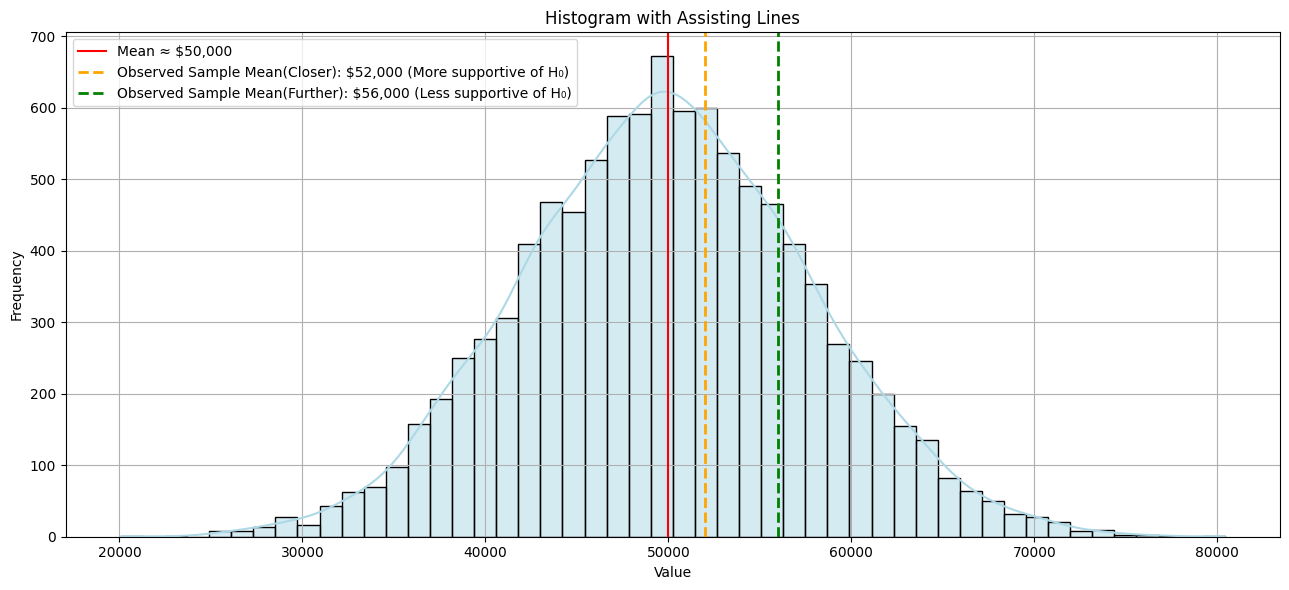

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data
np.random.seed(0)
data = np.random.normal(loc=50000, scale=8000, size=10000)
mean_val = 50000

# Choose two values: one near the mean, one far
closer_value = mean_val + 2000
further_value = mean_val + 6000

# Plot
plt.figure(figsize=(13, 6))
sns.histplot(data, bins=50, kde=True, color='lightblue')

# Draw mean line
plt.axvline(mean_val, color='red', linestyle='-', label=f'Mean ≈ ${mean_val:,.0f}')

# Draw assisting lines
plt.axvline(closer_value, color='orange', linestyle='--', label=f'Observed Sample Mean(Closer): ${closer_value:,.0f} (More supportive of H₀)', linewidth=2)
plt.axvline(further_value, color='green', linestyle='--', label=f'Observed Sample Mean(Further): ${further_value:,.0f} (Less supportive of H₀)', linewidth=2)

# Labels and legend
plt.title('Histogram with Assisting Lines')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Why can the null hypothesis be described by a normal distribution?

- Under certain conditions (especially with large sample sizes), the **[Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)** tells us that the sampling distribution of the sample mean approaches a normal distribution — even if the population data is not normally distributed.

- This allows us to model the null hypothesis using a bell-shaped curve centered at the hypothesized mean (e.g., $50,000).

In simpler terms:

If the **true population** has an average salary of $50,000, and we **keep randomly picking 30 people at a time**, then **each time we calculate the average salary of those 30 people**. If we r**epeat this many times**, we’ll end up with **a bunch of averages**：

- The shape of these averages will look like a **normal (bell-shaped) distribution**, even if the original salary distribution is skewed or non-normal.

- This distribution of averages will **be centered around $50,000**, which is the population mean.

This result comes from the **Central Limit Theorem**, and it’s the reason we can use a normal distribution to model the **null hypothesis** when testing whether a sample mean is unusually far from $50,000.

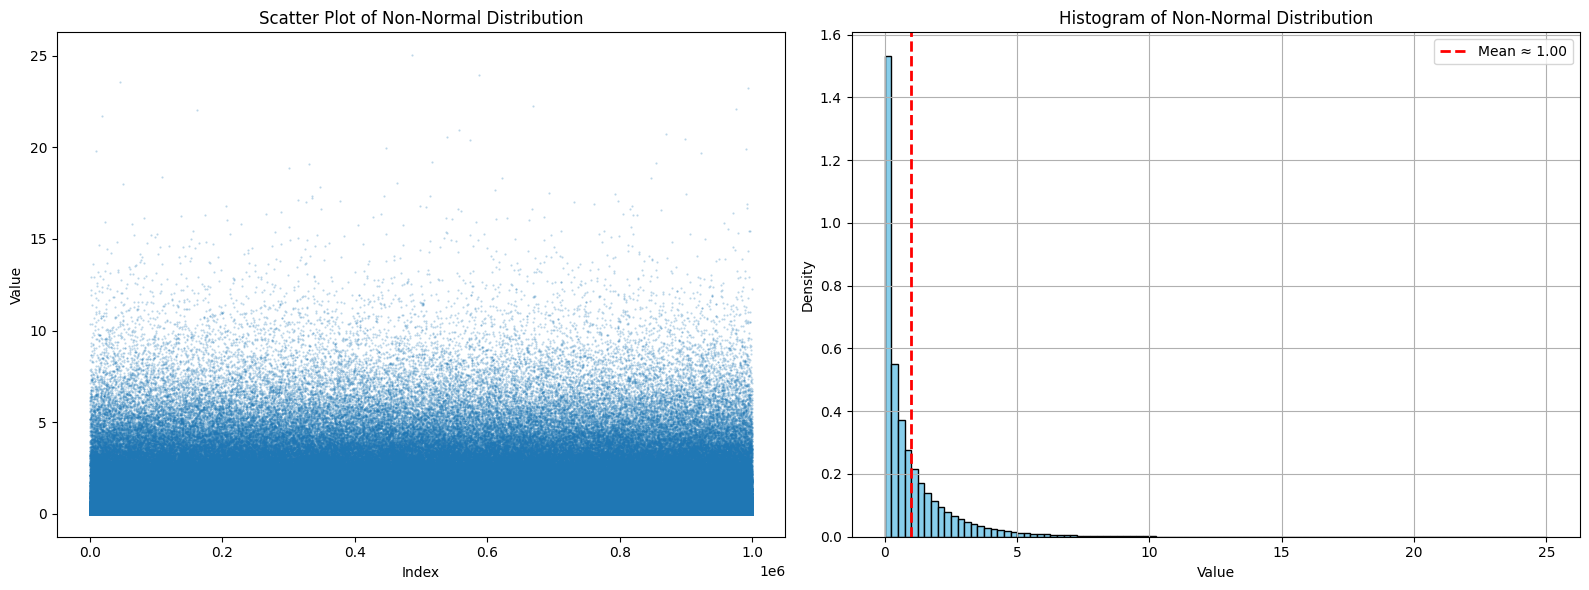

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Generate population data (not normally distributed)
N = 1_000_000
data = np.random.randn(N)**2  # Skewed, non-normal distribution

# Calculate the mean
mean_val = np.mean(data)

# Plot
plt.figure(figsize=(16, 6))

# Left: scatter plot
plt.subplot(1, 2, 1)
plt.plot(data, '.', alpha=0.3, markersize=1)
plt.title('Scatter Plot of Non-Normal Distribution')
plt.xlabel('Index')
plt.ylabel('Value')

# Right: histogram with mean line
plt.subplot(1, 2, 2)
plt.hist(data, bins=100, density=True, color='skyblue', edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean ≈ {mean_val:.2f}')
plt.title('Histogram of Non-Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

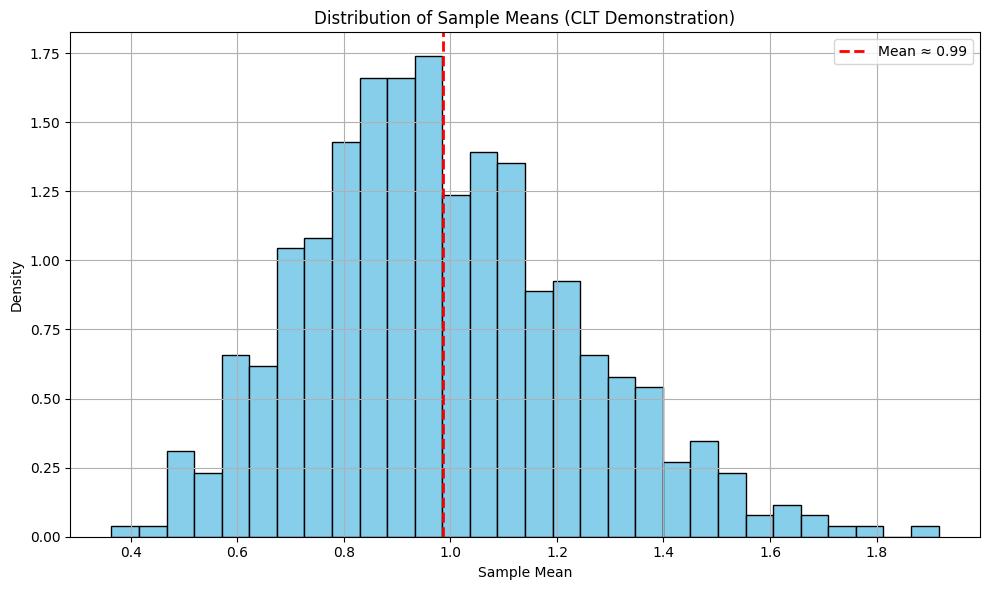

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set sample size (number of people per sample)
samplesize = 30

# Set how many times we repeat the sampling experiment
numberOfExps = 500

# Generate population data (skewed, non-normal)
N = 1_000_000
data = np.random.randn(N)**2  # This creates a right-skewed distribution

# Create an empty array to store the mean of each sample
samplemeans = np.zeros(numberOfExps)

# Repeated sampling
for expi in range(numberOfExps):
    sampleidx = np.random.randint(0, N, samplesize)
    samplemeans[expi] = np.mean(data[sampleidx])

# Compute the mean of all sample means
mean_of_samplemeans = np.mean(samplemeans)

# Plot the histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(samplemeans, bins=30, density=True, color='skyblue', edgecolor='black')

# Add a vertical line at the mean
plt.axvline(mean_of_samplemeans, color='red', linestyle='--', linewidth=2, label=f'Mean ≈ {mean_of_samplemeans:.2f}')

# Labeling and styling
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of Sample Means (CLT Demonstration)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

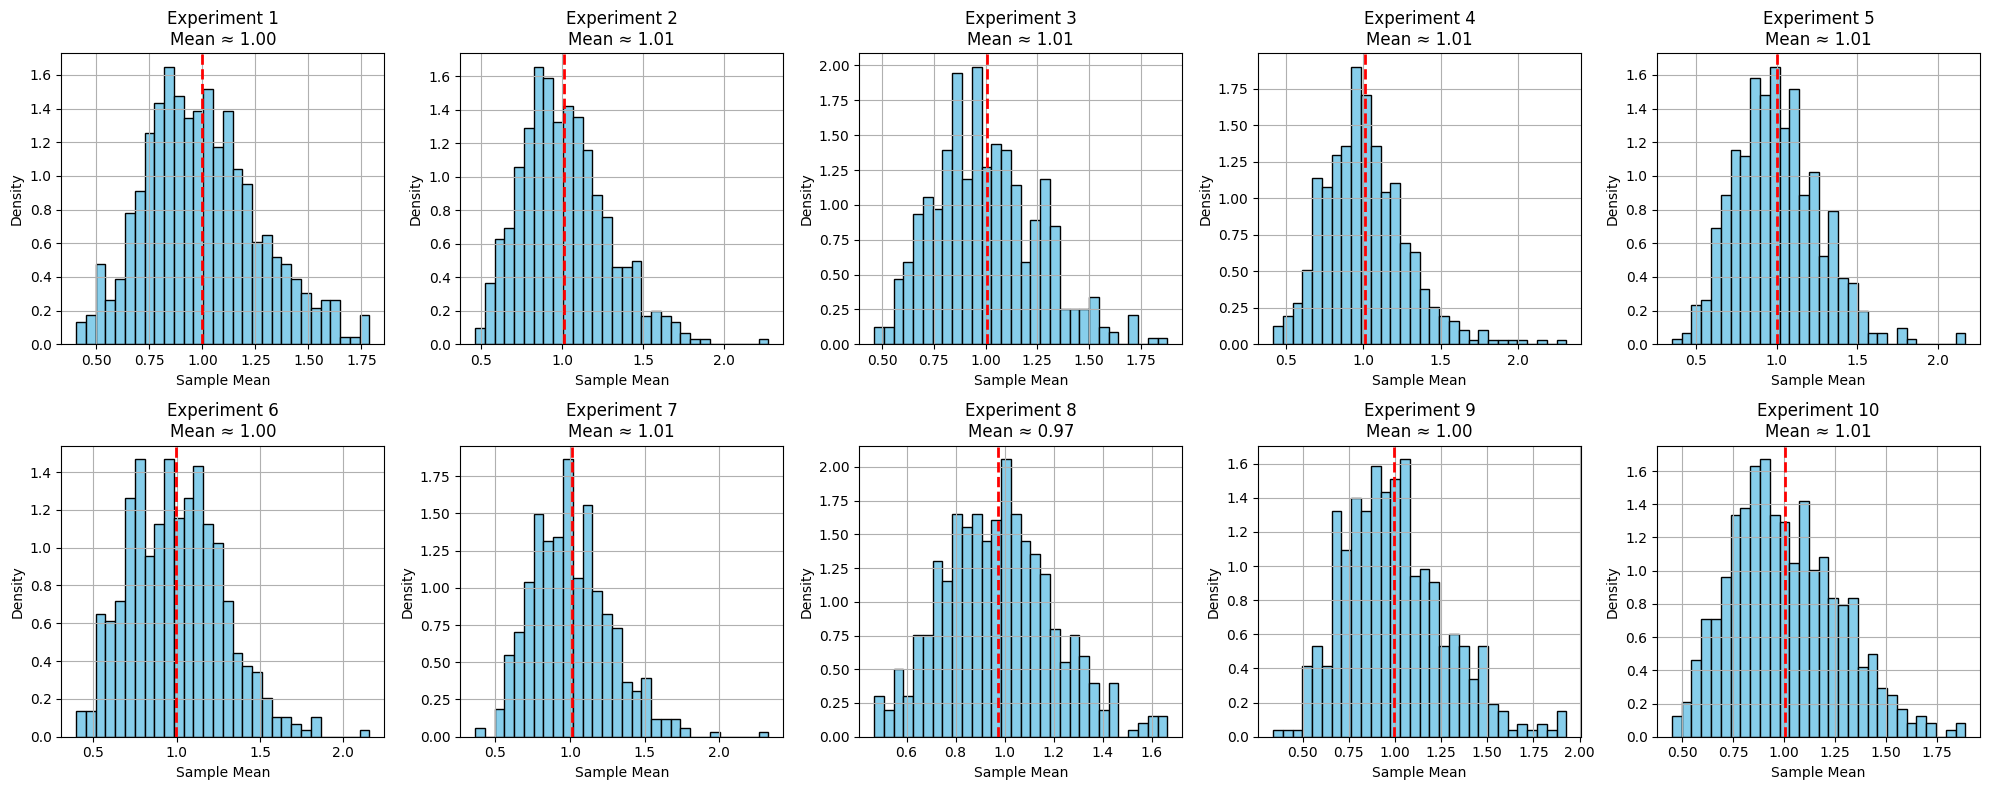

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
samplesize = 30
numberOfExps = 500
N = 1_000_000
data = np.random.randn(N)**2  # Right-skewed population

# Create subplots: 2 rows × 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i in range(10):
    # Generate sample means for this experiment
    samplemeans = np.zeros(numberOfExps)
    for expi in range(numberOfExps):
        sampleidx = np.random.randint(0, N, samplesize)
        samplemeans[expi] = np.mean(data[sampleidx])
    
    # Compute mean of sample means
    mean_of_samplemeans = np.mean(samplemeans)
    
    # Plot histogram
    ax = axes[i]
    ax.hist(samplemeans, bins=30, density=True, color='skyblue', edgecolor='black')
    ax.axvline(mean_of_samplemeans, color='red', linestyle='--', linewidth=2)
    ax.set_title(f'Experiment {i+1}\nMean ≈ {mean_of_samplemeans:.2f}')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')
    ax.grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()

某所大学的毕业生工资，是不是显著高于全国平均工资 $50,000？

我观察到样本均值是 $52,000，看起来好像比全国平均高。但这是不是只是巧合？

换句话说：这个差距是不是统计上显著？


Null Hypothesis H_0: $\mu$ = 50,000

Alternative Hypothesis H_a: $\mu$ > 50,000（单尾检验）

你想检验的是：这个学校的毕业生工资 是否显著更高。

$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} = \frac{52,000 - 50,000}{6000 / \sqrt{25}} = \frac{2000}{1200} = 1.667$

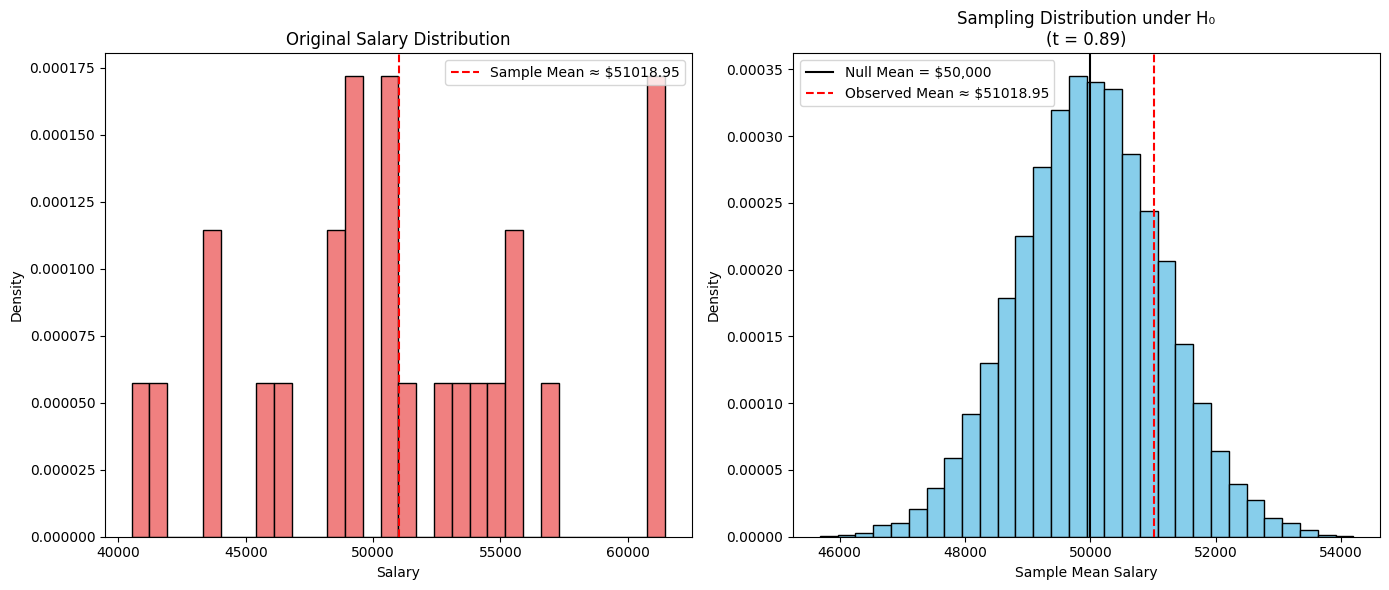

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
simulated_df = pd.read_csv('Simulated_Salary_Data.csv')
data = simulated_df['Simulated_Salary']

# Sample size and sample statistics
n = len(data)
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # use ddof=1 for sample std

# Null hypothesis: population mean = 50000
mu_null = 50000

# Compute t-value
t_value = (sample_mean - mu_null) / (sample_std / np.sqrt(n))

# Create null distribution for sample mean (CLT approximation)
null_distribution = np.random.normal(loc=mu_null, scale=sample_std/np.sqrt(n), size=10000)

# Plot original data and null distribution
plt.figure(figsize=(14, 6))

# Plot 1: Original salary distribution
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='lightcoral', edgecolor='black', density=True)
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Sample Mean ≈ ${sample_mean:.2f}')
plt.title('Original Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.legend()

# Plot 2: Sampling distribution under null hypothesis
plt.subplot(1, 2, 2)
plt.hist(null_distribution, bins=30, color='skyblue', edgecolor='black', density=True)
plt.axvline(mu_null, color='black', linestyle='-', label='Null Mean = $50,000')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Observed Mean ≈ ${sample_mean:.2f}')
plt.title(f'Sampling Distribution under H₀\n(t = {t_value:.2f})')
plt.xlabel('Sample Mean Salary')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

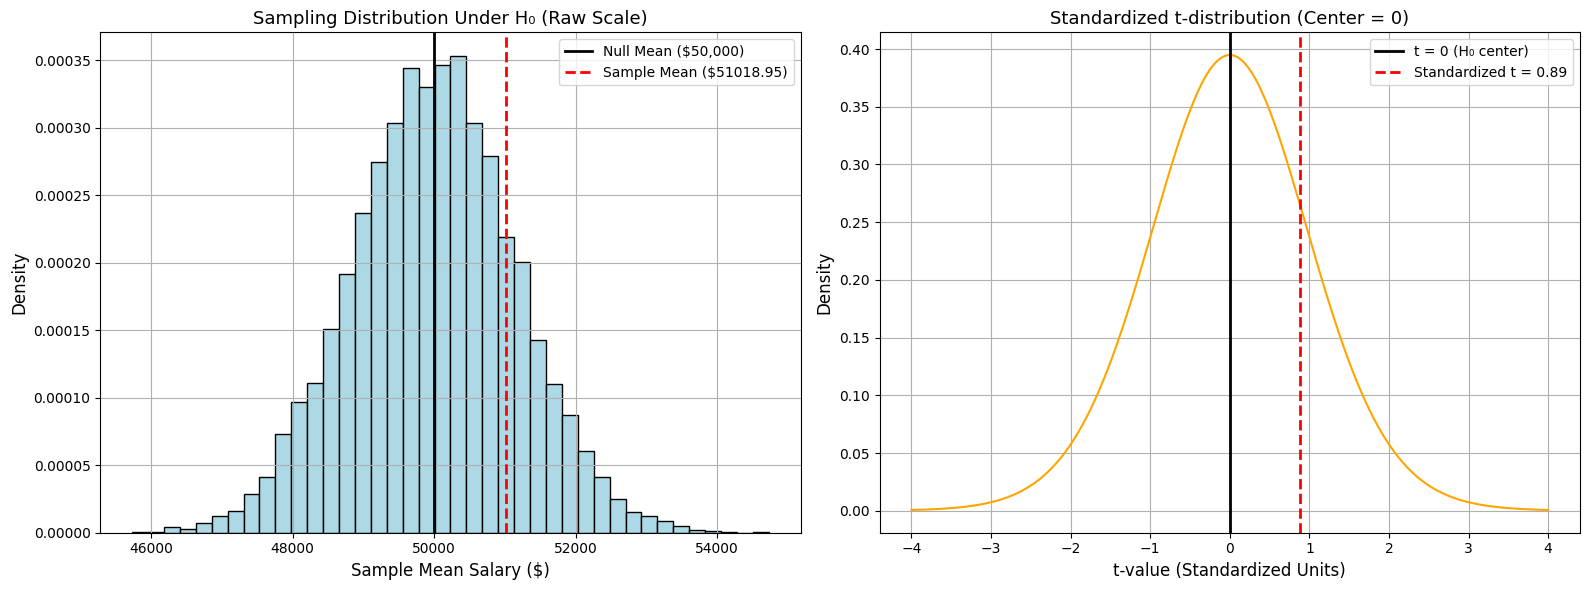

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

simulated_df = pd.read_csv('Simulated_Salary_Data.csv')
# 这里我们假设变量名是 Simulated_Salary
data = simulated_df['Simulated_Salary']  # 或者你手动填上你看到的那一列数据

# Key stats
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
mu_null = 50000
t_value = (sample_mean - mu_null) / (sample_std / np.sqrt(n))
df = n - 1

# Simulate null sampling distribution
null_dist = np.random.normal(loc=mu_null, scale=sample_std/np.sqrt(n), size=10000)

# Generate t-distribution
x = np.linspace(-4, 4, 300)
t_dist = stats.t.pdf(x, df)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Null sampling distribution (raw units)
axes[0].hist(null_dist, bins=40, color='lightblue', edgecolor='black', density=True)
axes[0].axvline(mu_null, color='black', linestyle='-', linewidth=2, label='Null Mean ($50,000)')
axes[0].axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Sample Mean (${sample_mean:.2f})')
axes[0].set_title('Sampling Distribution Under H₀ (Raw Scale)', fontsize=13)
axes[0].set_xlabel('Sample Mean Salary ($)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Right plot: Standardized t-distribution
axes[1].plot(x, t_dist, color='orange')
axes[1].axvline(0, color='black', linestyle='-', linewidth=2, label='t = 0 (H₀ center)')
axes[1].axvline(t_value, color='red', linestyle='--', linewidth=2, label=f'Standardized t = {t_value:.2f}')
axes[1].set_title('Standardized t-distribution (Center = 0)', fontsize=13)
axes[1].set_xlabel('t-value (Standardized Units)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

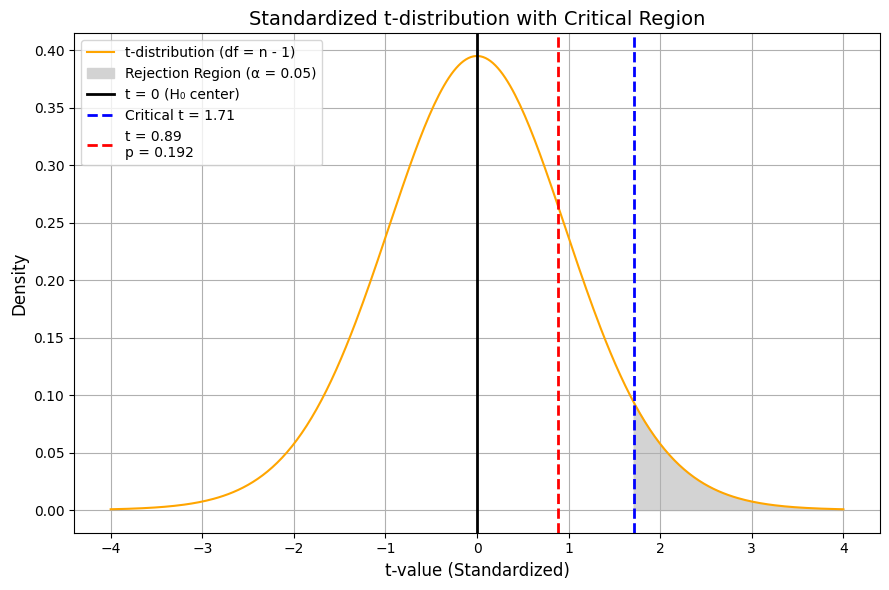

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Stats
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
mu_null = 50000
df = n - 1

# t-test result
t_value = (sample_mean - mu_null) / (sample_std / np.sqrt(n))
p_value = 1 - stats.t.cdf(t_value, df)

# Critical value at α = 0.05 (right-tailed)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha, df)

# Generate t-distribution
x = np.linspace(-4, 4, 300)
y = stats.t.pdf(x, df)

# Plot
plt.figure(figsize=(9, 6))
plt.plot(x, y, color='orange', label='t-distribution (df = n - 1)')

# Fill rejection region (right-tail)
x_alpha = np.linspace(t_critical, 4, 100)
y_alpha = stats.t.pdf(x_alpha, df)
plt.fill_between(x_alpha, y_alpha, color='lightgray', label=f'Rejection Region (α = {alpha})')

# Lines
plt.axvline(0, color='black', linestyle='-', linewidth=2, label='t = 0 (H₀ center)')
plt.axvline(t_critical, color='blue', linestyle='--', linewidth=2, label=f'Critical t = {t_critical:.2f}')
plt.axvline(t_value, color='red', linestyle='--', linewidth=2, label=f't = {t_value:.2f}\np = {p_value:.3f}')

# Labels
plt.title('Standardized t-distribution with Critical Region', fontsize=14)
plt.xlabel('t-value (Standardized)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

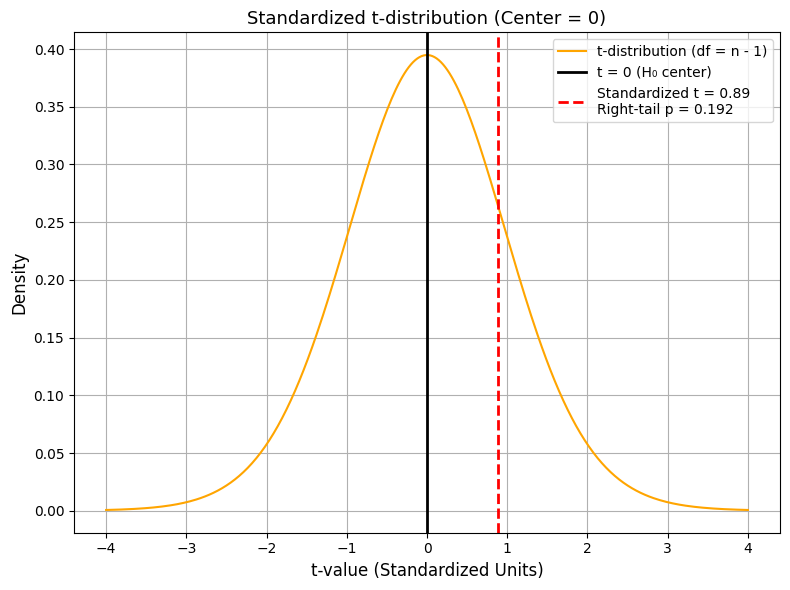

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

simulated_df = pd.read_csv('Simulated_Salary_Data.csv')
# 这里我们假设变量名是 Simulated_Salary
data = simulated_df['Simulated_Salary']  # 或者你手动填上你看到的那一列数据

# Key stats
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
mu_null = 50000

# t-value and degrees of freedom
t_value = (sample_mean - mu_null) / (sample_std / np.sqrt(n))
df = n - 1

# Right-tailed p-value
p_value = 1 - stats.t.cdf(t_value, df=df)

# Generate t-distribution curve
x = np.linspace(-4, 4, 300)
t_dist = stats.t.pdf(x, df)

# Plot: Standardized t-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, t_dist, color='orange', label='t-distribution (df = n - 1)')
plt.axvline(0, color='black', linestyle='-', linewidth=2, label='t = 0 (H₀ center)')
plt.axvline(t_value, color='red', linestyle='--', linewidth=2,
            label=f'Standardized t = {t_value:.2f}\nRight-tail p = {p_value:.3f}')

plt.title('Standardized t-distribution (Center = 0)', fontsize=13)
plt.xlabel('t-value (Standardized Units)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import numpy as np
from scipy import stats

# 加载数据（假设你已经有一个叫 simulated_df 的 DataFrame）
# 你也可以用 pd.read_csv() 载入 CSV 文件
simulated_df = pd.read_csv('Simulated_Salary_Data.csv')
# 这里我们假设变量名是 Simulated_Salary
data = simulated_df['Simulated_Salary']  # 或者你手动填上你看到的那一列数据

# 步骤 1：设定理论值（全国平均工资）
mu_0 = 50000

# 步骤 2：计算样本统计量
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # 样本标准差（注意 ddof=1）
n = len(data)
SE = sample_std / np.sqrt(n)       # 标准误差

# 步骤 3：计算 t 统计量
t_stat = (sample_mean - mu_0) / SE

# 步骤 4：计算 p 值（这里用单尾检验，检验均值是否“显著大于” 50,000）
p_value = 1 - stats.t.cdf(t_stat, df=n - 1)

# 步骤 5：打印结果
print(f"样本均值: {sample_mean:.2f}")
print(f"样本标准差: {sample_std:.2f}")
print(f"样本容量: {n}")
print(f"标准误差 SE: {SE:.2f}")
print(f"t 值: {t_stat:.4f}")
print(f"自由度: {n - 1}")
print(f"单尾 p 值: {p_value:.4f}")

# 判断显著性
alpha = 0.05
if p_value < alpha:
    print(f"在显著性水平 {alpha} 下，拒绝 H₀，说明平均工资显著高于 50,000。")
else:
    print(f"在显著性水平 {alpha} 下，不能拒绝 H₀，无法说明工资显著高于 50,000。")

样本均值: 51018.95
样本标准差: 5739.32
样本容量: 25
标准误差 SE: 1147.86
t 值: 0.8877
自由度: 24
单尾 p 值: 0.1918
在显著性水平 0.05 下，不能拒绝 H₀，无法说明工资显著高于 50,000。


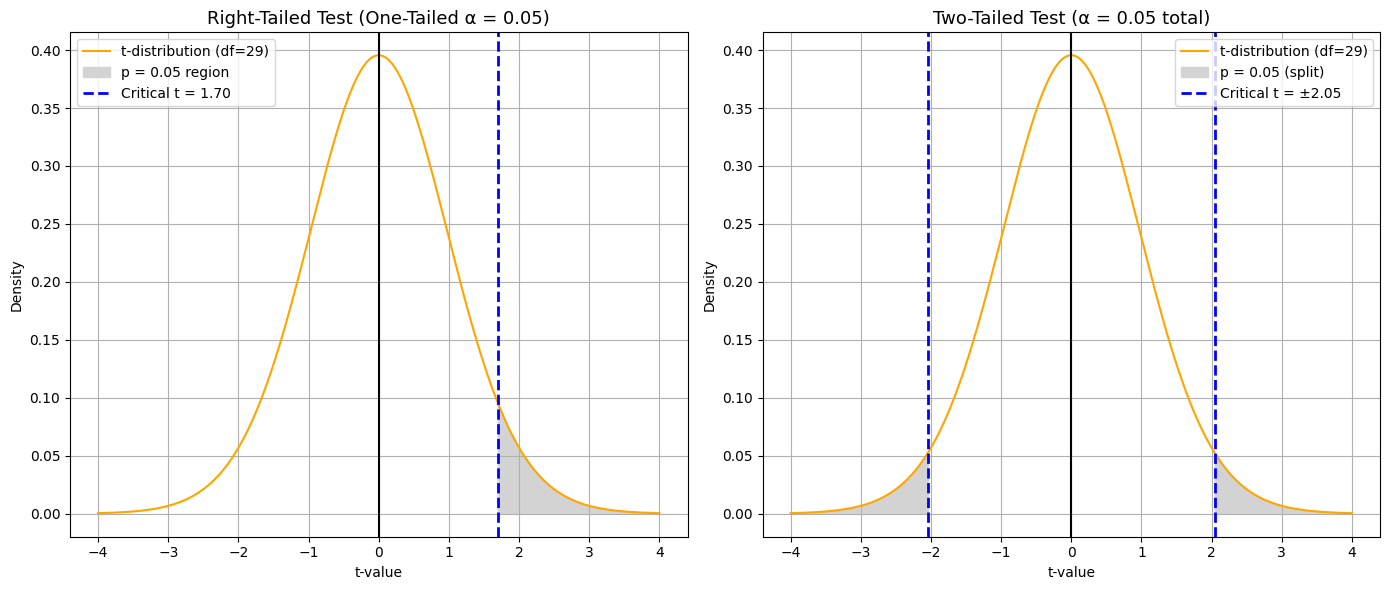

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
df = 29
alpha = 0.05

# Critical t-values
t_crit_one = stats.t.ppf(1 - alpha, df)
t_crit_two = stats.t.ppf(1 - alpha / 2, df)

# t-distribution
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
titles = ['Right-Tailed Test (One-Tailed α = 0.05)', 'Two-Tailed Test (α = 0.05 total)']

for i, ax in enumerate(axes):
    ax.plot(x, y, color='orange', label='t-distribution (df=29)')
    ax.axvline(0, color='black', linestyle='-')

    if i == 0:
        # Right-tailed (single tail)
        x_fill = np.linspace(t_crit_one, 4, 100)
        y_fill = stats.t.pdf(x_fill, df)
        ax.fill_between(x_fill, y_fill, color='lightgray', label='p = 0.05 region')
        ax.axvline(t_crit_one, color='blue', linestyle='--', linewidth=2, label=f'Critical t = {t_crit_one:.2f}')
    else:
        # Two-tailed (split)
        x_fill_right = np.linspace(t_crit_two, 4, 100)
        x_fill_left = np.linspace(-4, -t_crit_two, 100)
        y_right = stats.t.pdf(x_fill_right, df)
        y_left = stats.t.pdf(x_fill_left, df)
        ax.fill_between(x_fill_right, y_right, color='lightgray')
        ax.fill_between(x_fill_left, y_left, color='lightgray', label='p = 0.05 (split)')
        ax.axvline(t_crit_two, color='blue', linestyle='--', linewidth=2, label=f'Critical t = ±{t_crit_two:.2f}')
        ax.axvline(-t_crit_two, color='blue', linestyle='--', linewidth=2)

    ax.set_title(titles[i], fontsize=13)
    ax.set_xlabel('t-value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()